In [97]:
import findspark
findspark.init('spark-3.2.1-bin-hadoop2.7')
import pyspark as ps
from pyspark.sql import SparkSession
from pyspark.sql.functions import when
spark = SparkSession.builder.appName('Iteration4').getOrCreate()

In [98]:
df = spark.read.csv("./diabetes_012_health_indicators_BRFSS2015.csv", header = "true")
df.printSchema()
df.columns

root
 |-- Diabetes_012: string (nullable = true)
 |-- HighBP: string (nullable = true)
 |-- HighChol: string (nullable = true)
 |-- CholCheck: string (nullable = true)
 |-- BMI: string (nullable = true)
 |-- Smoker: string (nullable = true)
 |-- Stroke: string (nullable = true)
 |-- HeartDiseaseorAttack: string (nullable = true)
 |-- PhysActivity: string (nullable = true)
 |-- Fruits: string (nullable = true)
 |-- Veggies: string (nullable = true)
 |-- HvyAlcoholConsump: string (nullable = true)
 |-- AnyHealthcare: string (nullable = true)
 |-- NoDocbcCost: string (nullable = true)
 |-- GenHlth: string (nullable = true)
 |-- MentHlth: string (nullable = true)
 |-- PhysHlth: string (nullable = true)
 |-- DiffWalk: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Income: string (nullable = true)



['Diabetes_012',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [99]:
"2.3 Explore the data"

'2.3 Explore the data'

In [100]:
df.createOrReplaceTempView('diabetes_012_health_indicators_BRFSS2015')
result1 = spark.sql("SELECT COUNT(Diabetes_012) AS No_diabetes from diabetes_012_health_indicators_BRFSS2015 WHERE Diabetes_012 = 0  ")
result1.show()
result2 = spark.sql("SELECT COUNT(Diabetes_012) AS Pre_diabetes from diabetes_012_health_indicators_BRFSS2015  WHERE Diabetes_012 = 1")
result2.show()
result3 = spark.sql("SELECT COUNT(Diabetes_012) AS Diabetes from diabetes_012_health_indicators_BRFSS2015  WHERE Diabetes_012 = 2")
result3.show()

+-----------+
|No_diabetes|
+-----------+
|     213703|
+-----------+

+------------+
|Pre_diabetes|
+------------+
|        4631|
+------------+

+--------+
|Diabetes|
+--------+
|   35346|
+--------+



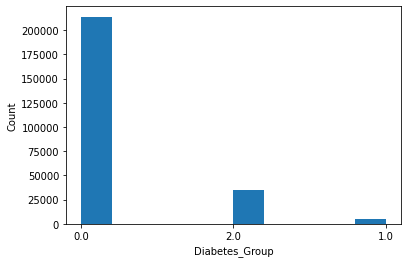

In [101]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
DiabetesArr = np.array(df.select('Diabetes_012').collect())
plt.xlabel('Diabetes_Group')
plt.ylabel('Count')
plt.hist(DiabetesArr)
plt.show()

In [102]:
df.describe().toPandas()

,summary,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,count,253680,253680,253680,253680,253680,253680,253680,253680,253680,...,253680,253680,253680,253680,253680,253680,253680,253680,253680,253680
1,mean,0.29692131819615264,0.4290011037527594,0.4241209397666351,0.9626695048880479,28.382363607694735,0.44316855881425415,0.04057079785556607,0.09418558814254178,0.7565436770734784,...,0.9510525070955534,0.08417691579943236,2.5113923052664773,3.1847721538946705,4.2420805739514345,0.16822374645222327,0.4403421633554084,8.032119205298013,5.050433617155472,6.053874960580258
2,stddev,0.6981597284090991,0.49493446268990043,0.49420980465688596,0.18957075436272514,6.608694201406001,0.4967606667785607,0.1972940994001612,0.2920873147507536,0.4291690433970471,...,0.21575870631073912,0.27765350085762547,1.068477362280392,7.412846696196214,8.717951307175158,0.3740655947328013,0.49642916311850416,3.0542204341684855,0.9857741757276508,2.071147566271524
3,min,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,max,2.0,1.0,1.0,1.0,98.0,1.0,1.0,1.0,1.0,...,1.0,1.0,5.0,9.0,9.0,1.0,1.0,9.0,6.0,8.0


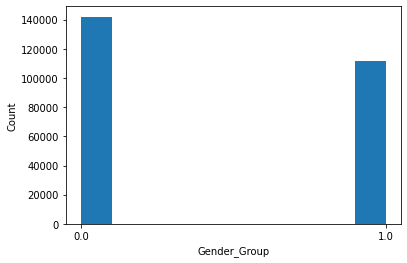

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
Sex = np.array(df.select('Sex').collect())
plt.xlabel('Gender_Group')
plt.ylabel('Count')
plt.hist(Sex)
plt.show()

In [104]:
dfaa = df.toPandas()
dfaa['BMI']=dfaa['BMI'].astype(float)

<AxesSubplot: >

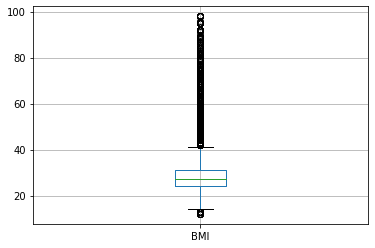

In [105]:
dfaa.boxplot(column='BMI')

<AxesSubplot: >

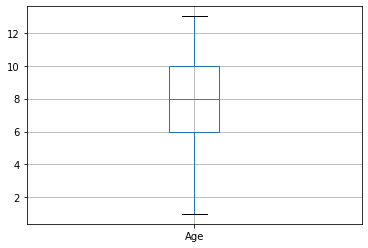

In [106]:
dfaa = df.toPandas()
dfaa['Age']=dfaa['Age'].astype(float)
dfaa.boxplot(column='Age')

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
new_df = df.toPandas()
new_df.describe()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680,253680,253680,253680,253680,253680,253680,253680,253680,253680,...,253680,253680,253680,253680,253680,253680,253680,253680,253680,253680
unique,3,2,2,2,84,2,2,2,2,2,...,2,2,5,31,31,2,2,13,6,8
top,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0
freq,213703,144851,146089,244210,24606,141257,243388,229787,191920,160898,...,241263,232326,89084,175680,160052,211005,141974,33244,107325,90385


In [108]:
new_df['Diabetes_012']=new_df['Diabetes_012'].astype(float)
new_df['Sex']=new_df['Sex'].astype(float)
new_df['BMI']=new_df['BMI'].astype(float)
new_df['Age']=new_df['Age'].astype(float)

In [109]:
from pyspark.sql.functions import col, explode, array, lit
no_dia = df.filter(col("Diabetes_012") == 0)
print(no_dia.count())
pre_dia = df.filter(col("Diabetes_012") == 1)
print(pre_dia.count())
dia = df.filter(col("Diabetes_012") == 2)
print(dia.count())
ratio1 = int(no_dia.count()/pre_dia.count())
ratio2 = int(no_dia.count()/dia.count())
print(ratio1,ratio2)

213703
4631
35346
46 6


In [110]:
#Use PySpark explode to solve oversampling in diabetes patients number

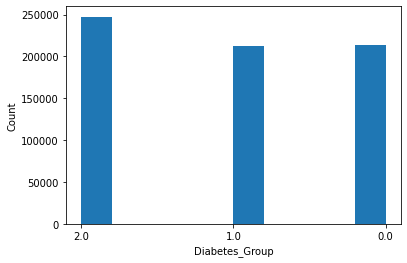

In [111]:
a = range(ratio1)
oversampled_df = pre_dia.withColumn("dummy", explode(array([lit(x) for x in a]))).drop('dummy')
combined_df = dia.unionAll(oversampled_df)
b = range(ratio2)
oversampled_df2 = dia.withColumn("dummy", explode(array([lit(x) for x in b]))).drop('dummy')
combined_df2 = no_dia.unionAll(oversampled_df2)
combined_df3 = combined_df.unionAll(combined_df2)
balance = np.array(combined_df3.select('Diabetes_012').collect())
plt.xlabel('Diabetes_Group')
plt.ylabel('Count')
plt.hist(balance)
plt.show()

In [112]:
new_df = combined_df3

In [113]:
new_df.describe().toPandas()

,summary,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,count,674151,674151,674151,674151,674151,674151,674151,674151,674151,...,674151,674151,674151,674151,674151,674151,674151,674151,674151,674151
1,mean,1.05001698432547,0.5926535746442563,0.5623102242672635,0.9796692432407577,30.226790437157256,0.48211009106268476,0.06204099674998628,0.1498788847009053,0.6927706107385437,...,0.9519707009260536,0.10496313140527865,2.900133649582957,4.002315504983305,6.061016003832969,0.26585438573850667,0.45172520696401847,8.780799850478601,4.872304572714421,5.571196957358218
2,stddev,0.8255348514776777,0.4913406895514607,0.4961026113919536,0.14112918420131107,7.125116448692973,0.49968021926109957,0.24123017595481597,0.3569529291419054,0.4613456484576627,...,0.21382832676432997,0.3065061366521579,1.0879744230733153,8.410205547251802,10.195654036001438,0.44178741588694087,0.49766445697658906,2.777155918708506,1.046688205168126,2.1936598189733885
3,min,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,max,2.0,1.0,1.0,1.0,98.0,1.0,1.0,1.0,1.0,...,1.0,1.0,5.0,9.0,9.0,1.0,1.0,9.0,6.0,8.0


In [114]:
from pyspark.sql.functions import col, explode, array, lit
no_dia = new_df.filter(col("Diabetes_012") == 0)
print(no_dia.count())
pre_dia = new_df.filter(col("Diabetes_012") == 1)
print(pre_dia.count())
dia = new_df.filter(col("Diabetes_012") == 2)
print(dia.count())

213703


213026


247422


In [115]:
#Verify Data quality

In [116]:
from pyspark.sql.functions import col,isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+------------+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
|Diabetes_012|HighBP|HighChol|CholCheck|BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex|Age|Education|Income|
+------------+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
|           0|     0|       0|        0|  0|     0|     0|                   0|           0|     0|      0|                0|            0|          0|      0|       0|       0|       0|  0|  0|        0|     0|
+------------+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-

In [117]:
#Data selection

In [118]:
new_df = df.drop("CholCheck","Stroke", "HeartDiseaseorAttack", "AnyHealthcare","NoDocbcCost","GenHlth","MentHlth","PhysHlth","DiffWalk","Income", "Education") 
new_df.printSchema()
new_df.head()

root
 |-- Diabetes_012: string (nullable = true)
 |-- HighBP: string (nullable = true)
 |-- HighChol: string (nullable = true)
 |-- BMI: string (nullable = true)
 |-- Smoker: string (nullable = true)
 |-- PhysActivity: string (nullable = true)
 |-- Fruits: string (nullable = true)
 |-- Veggies: string (nullable = true)
 |-- HvyAlcoholConsump: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)



Row(Diabetes_012='0.0', HighBP='1.0', HighChol='1.0', BMI='40.0', Smoker='1.0', PhysActivity='0.0', Fruits='0.0', Veggies='1.0', HvyAlcoholConsump='0.0', Sex='0.0', Age='9.0')

In [119]:
#Cleaning the data

In [120]:
new_df = new_df.withColumn("Age",new_df.Age.cast('int'))
new_df = new_df.withColumn("Diabetes_012",new_df.Diabetes_012.cast('int'))
new_df = new_df.withColumn("HighBP",new_df.HighBP.cast('int'))
new_df = new_df.withColumn("HighChol",new_df.HighChol.cast('int'))
new_df = new_df.withColumn("BMI",new_df.BMI.cast('int'))
new_df = new_df.withColumn("Smoker",new_df.Smoker.cast('int'))
new_df = new_df.withColumn("PhysActivity",new_df.PhysActivity.cast('int'))
new_df = new_df.withColumn("Fruits",new_df.Fruits.cast('int'))
new_df = new_df.withColumn("Veggies",new_df.Veggies.cast('int'))
new_df = new_df.withColumn("HvyAlcoholConsump",new_df.HvyAlcoholConsump.cast('int'))
new_df = new_df.withColumn("Sex",new_df.Sex.cast('int'))

In [121]:
import pyspark.sql.functions as f

bounds = {
    c: dict(
        zip(["low", "high"], new_df.approxQuantile(c, [0.1, 0.90], 0))
    )
    for c in new_df.columns
}
print(bounds)

{'Diabetes_012': {'low': 0.0, 'high': 2.0}, 'HighBP': {'low': 0.0, 'high': 1.0}, 'HighChol': {'low': 0.0, 'high': 1.0}, 'BMI': {'low': 22.0, 'high': 36.0}, 'Smoker': {'low': 0.0, 'high': 1.0}, 'PhysActivity': {'low': 0.0, 'high': 1.0}, 'Fruits': {'low': 0.0, 'high': 1.0}, 'Veggies': {'low': 0.0, 'high': 1.0}, 'HvyAlcoholConsump': {'low': 0.0, 'high': 0.0}, 'Sex': {'low': 0.0, 'high': 1.0}, 'Age': {'low': 4.0, 'high': 12.0}}


In [122]:
from pyspark.sql.functions import col
new_df = new_df.filter(col("BMI") > 23)
new_df = new_df.filter(col("BMI") < 33)
row1 = new_df.agg({"BMI": "max"}).collect()[0]
print(row1)
row1 = new_df.agg({"BMI": "min"}).collect()[0]
print(row1)

Row(max(BMI)=32)
Row(min(BMI)=24)


<AxesSubplot: >

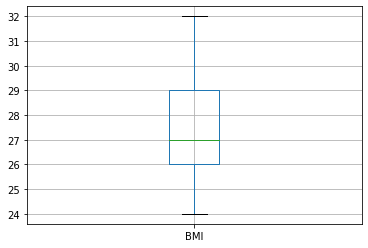

In [123]:
dfaa = new_df.toPandas()
dfaa['BMI']=dfaa['BMI'].astype(float)
dfaa.boxplot(column='BMI')

In [124]:
#Construct New data - BMI Group

In [125]:
from pyspark.sql.functions import when
new_df = new_df.withColumn("BMI_Group", \
   when((new_df.BMI < 18.5), lit("underweight")) \
     .when((new_df.BMI >= 18.5) & (new_df.BMI <= 25), lit("healthy weight")) \
     .when((new_df.BMI >= 25) & (new_df.BMI <= 30), lit("overweight")) \
     .otherwise(lit("obesity")) \
  )

In [126]:
#Construct New data - Age group

In [127]:
from pyspark.sql.functions import when
new_df = new_df.withColumn("Age_group", \
   when((new_df.Age == 1 ), lit("18-24")) \
     .when((new_df.Age == 2), lit("24-30")) \
     .when((new_df.Age == 3), lit("30-36")) \
     .when((new_df.Age == 4), lit("36-42")) \
     .when((new_df.Age == 5), lit("42-48")) \
     .when((new_df.Age == 6), lit("48-54")) \
     .when((new_df.Age == 7), lit("54-60")) \
     .when((new_df.Age == 8), lit("60-66")) \
     .when((new_df.Age == 9), lit("66-72")) \
     .when((new_df.Age == 10), lit("72-78")) \
     .when((new_df.Age == 11), lit("78-84")) \
     .when((new_df.Age == 12), lit("84-90")) \
     .otherwise(lit("90+")) \
  )


In [128]:
from pyspark.sql.functions import monotonically_increasing_id 
new_df_index = new_df.select("*").withColumn("ID", monotonically_increasing_id())
new_df_index.show()

+------------+------+--------+---+------+------------+------+-------+-----------------+---+---+--------------+---------+---+
|Diabetes_012|HighBP|HighChol|BMI|Smoker|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|Sex|Age|     BMI_Group|Age_group| ID|
+------------+------+--------+---+------+------------+------+-------+-----------------+---+---+--------------+---------+---+
|           0|     0|       0| 25|     1|           1|     0|      0|                0|  0|  7|healthy weight|    54-60|  0|
|           0|     1|       1| 28|     0|           0|     1|      0|                0|  0|  9|    overweight|    66-72|  1|
|           0|     1|       0| 27|     0|           1|     1|      1|                0|  0| 11|    overweight|    78-84|  2|
|           0|     1|       1| 24|     0|           1|     1|      1|                0|  0| 11|healthy weight|    78-84|  3|
|           0|     1|       1| 25|     1|           1|     1|      1|                0|  1| 10|healthy weight|    72-78|  4|


In [129]:
df = df.withColumn("Age",df.Age.cast('int'))
df = df.withColumn("Diabetes_012",df.Diabetes_012.cast('int'))
df = df.withColumn("HighBP",df.HighBP.cast('int'))
df = df.withColumn("HighChol",df.HighChol.cast('int'))
df = df.withColumn("BMI",df.BMI.cast('int'))
df = df.withColumn("Smoker",df.Smoker.cast('int'))
df = df.withColumn("PhysActivity",df.PhysActivity.cast('int'))
df = df.withColumn("Fruits",df.Fruits.cast('int'))
df = df.withColumn("Veggies",df.Veggies.cast('int'))
df = df.withColumn("HvyAlcoholConsump",df.HvyAlcoholConsump.cast('int'))
df = df.withColumn("Sex",df.Sex.cast('int'))
df = df.drop("CholCheck","Stroke", "HeartDiseaseorAttack", "AnyHealthcare","NoDocbcCost","GenHlth","MentHlth","PhysHlth","DiffWalk","Income", "Education") 

In [130]:
'Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'Sex', 'Age'

('Diabetes_012',
 'HighBP',
 'HighChol',
 'BMI',
 'Smoker',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'Sex',
 'Age')

In [131]:
from pyspark import SparkContext
from pyspark import SQLContext
sc = SparkContext.getOrCreate()
spark = SQLContext(sc)
from pyspark.sql.functions import *
from pyspark.ml.classification import  RandomForestClassifier
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, VectorSlicer
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.linalg import Vectors
df.dtypes

/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


[('Diabetes_012', 'int'),
 ('HighBP', 'int'),
 ('HighChol', 'int'),
 ('BMI', 'int'),
 ('Smoker', 'int'),
 ('PhysActivity', 'int'),
 ('Fruits', 'int'),
 ('Veggies', 'int'),
 ('HvyAlcoholConsump', 'int'),
 ('Sex', 'int'),
 ('Age', 'int')]

In [132]:
#Construct feature selection using Chi square selector

In [133]:
data = spark.read.csv('./diabetes_binary_health_indicators_BRFSS2015.csv',inferSchema=True,header=True)
assembler = VectorAssembler(inputCols=[
 'HighBP', 'HighChol', 'BMI'
],outputCol='features')
output = assembler.transform(data)

In [134]:
indexer = StringIndexer(inputCol="Diabetes_binary", outputCol="Diabetes_012Index")
output_fixed = indexer.fit(output).transform(output)
final_data = output_fixed.select("features",'Diabetes_012Index')
final_data.head()

Row(features=DenseVector([1.0, 1.0, 40.0]), Diabetes_012Index=0.0)

In [135]:
from pyspark.ml.feature import ChiSqSelector
selector = ChiSqSelector(numTopFeatures=3, featuresCol='features', labelCol = 'Diabetes_012Index', outputCol='selectedFeatures')
model = selector.fit(final_data)
model.transform(final_data).show()


+--------------+-----------------+----------------+
|      features|Diabetes_012Index|selectedFeatures|
+--------------+-----------------+----------------+
|[1.0,1.0,40.0]|              0.0|  [1.0,1.0,40.0]|
|[0.0,0.0,25.0]|              0.0|  [0.0,0.0,25.0]|
|[1.0,1.0,28.0]|              0.0|  [1.0,1.0,28.0]|
|[1.0,0.0,27.0]|              0.0|  [1.0,0.0,27.0]|
|[1.0,1.0,24.0]|              0.0|  [1.0,1.0,24.0]|
|[1.0,1.0,25.0]|              0.0|  [1.0,1.0,25.0]|
|[1.0,0.0,30.0]|              0.0|  [1.0,0.0,30.0]|
|[1.0,1.0,25.0]|              0.0|  [1.0,1.0,25.0]|
|[1.0,1.0,30.0]|              1.0|  [1.0,1.0,30.0]|
|[0.0,0.0,24.0]|              0.0|  [0.0,0.0,24.0]|
|[0.0,0.0,25.0]|              1.0|  [0.0,0.0,25.0]|
|[1.0,1.0,34.0]|              0.0|  [1.0,1.0,34.0]|
|[0.0,0.0,26.0]|              0.0|  [0.0,0.0,26.0]|
|[1.0,1.0,28.0]|              1.0|  [1.0,1.0,28.0]|
|[0.0,1.0,33.0]|              0.0|  [0.0,1.0,33.0]|
|[1.0,0.0,33.0]|              0.0|  [1.0,0.0,33.0]|
|[1.0,1.0,21

In [136]:
df = df.drop('Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'Sex', 'Age')

In [137]:
#Build logistics regression

In [138]:
spark = SparkSession.builder.appName('logistic_regression_docs').getOrCreate()
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)

In [139]:
HighBP_indexer = StringIndexer(inputCol='HighBP',outputCol='HighBPIndex')
HighBP_encoder = OneHotEncoder(inputCol='HighBPIndex',outputCol='HighBPVec')
HighChol_indexer = StringIndexer(inputCol='HighChol',outputCol='HighCholIndex')
HighChol_encoder = OneHotEncoder(inputCol='HighCholIndex',outputCol='HighCholVec')
BMI_indexer = StringIndexer(inputCol='BMI',outputCol='BMIIndex')
BMI_encoder = OneHotEncoder(inputCol='BMIIndex',outputCol='BMIVec')


In [140]:
assembler = VectorAssembler(inputCols=[
 'HighBP',
 'HighChol',
 'BMI'],outputCol='features')

In [141]:
from pyspark.ml import Pipeline

In [142]:
log_reg_diabete = LogisticRegression(featuresCol='features',labelCol='Diabetes_012')

In [143]:
pipeline = Pipeline(stages=[HighBP_indexer,HighChol_indexer,BMI_indexer,
                           HighBP_encoder,HighChol_encoder,BMI_encoder,
                           assembler,log_reg_diabete])

In [144]:
train_diabete_data, test_diabete_data = df.randomSplit([0.7,0.3])

In [145]:
fit_model = pipeline.fit(train_diabete_data)

In [146]:
results = fit_model.transform(test_diabete_data)

In [147]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

my_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='Diabetes_012')

In [148]:
AUC = my_eval.evaluate(results)

AUC

0.5188685878578169

In [149]:
totalResults = results.select('Diabetes_012','prediction')

correctResults = totalResults.filter(totalResults['Diabetes_012'] == totalResults['prediction'])

countTR = totalResults.count()
print("Correct: " + str(countTR))

countTC = correctResults.count()
print("Total Correct: " + str(countTC)) 

Correct: 76072


Total Correct: 63883


In [180]:
from pyspark import SparkContext
from pyspark import SQLContext
sc = SparkContext.getOrCreate()
spark = SQLContext(sc)
assembler = VectorAssembler(inputCols=[
 'HighBP',
 'HighChol',
 'BMI'],outputCol='features')


In [196]:
#Construct random forest

In [197]:
data = spark.read.csv('./diabetes_binary_health_indicators_BRFSS2015.csv',inferSchema=True,header=True)

In [198]:
from pyspark.ml.feature import StringIndexer

In [199]:
output = assembler.transform(data)

In [200]:
indexer = StringIndexer(inputCol="Diabetes_binary", outputCol="Diabetes_012Index")
output_fixed = indexer.fit(output).transform(output)

In [201]:
final_data = output_fixed.select("features",'Diabetes_012Index')

In [202]:
train_data,test_data = final_data.randomSplit([0.8,0.2])

In [203]:
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

In [204]:
dtc = DecisionTreeClassifier(labelCol='Diabetes_012Index',featuresCol='features')
rfc = RandomForestClassifier(labelCol='Diabetes_012Index',featuresCol='features')
gbt = GBTClassifier(labelCol='Diabetes_012Index',featuresCol='features')

In [205]:
dtc_model = dtc.fit(train_data)
rfc_model = rfc.fit(train_data)
gbt_model = gbt.fit(train_data)

In [206]:
dtc_predictions = dtc_model.transform(test_data)
rfc_predictions = rfc_model.transform(test_data)
gbt_predictions = gbt_model.transform(test_data)

In [207]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'Diabetes_012Index')

In [208]:
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))

DTC


0.45930959233603397


In [209]:
print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))
my_binary_gbt_eval = BinaryClassificationEvaluator(labelCol='Diabetes_012Index', rawPredictionCol='prediction')

RFC


0.7446050084251519


In [210]:
print("GBT")
print(my_binary_gbt_eval.evaluate(gbt_predictions))

GBT


0.5114120525977262


In [166]:
assembler = VectorAssembler(inputCols=[
 'HighBP', 'HighChol', 'BMI'],outputCol='features')

In [167]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [168]:
acc_evaluator = MulticlassClassificationEvaluator(labelCol="Diabetes_012Index", predictionCol="prediction", metricName="accuracy")

In [169]:
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
gbt_acc = acc_evaluator.evaluate(gbt_predictions)

In [170]:
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)
print('An ensemble using GBT has an accuracy of: {0:2.2f}%'.format(gbt_acc*100))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 86.20%
----------------------------------------
A random forest ensemble has an accuracy of: 86.07%
----------------------------------------
An ensemble using GBT has an accuracy of: 86.14%


In [171]:
#Construct Linear SVC

In [172]:
from pyspark.ml.classification import LinearSVC
print("Linear SVC ")
svc = LinearSVC(labelCol="Diabetes_012Index", featuresCol = "features")
svc_model = svc.fit(train_data)
svc_predictions = svc_model.transform(test_data)
binary_eval = BinaryClassificationEvaluator(labelCol = 'Diabetes_012Index')
print("Accuracy: ",binary_eval.evaluate(svc_predictions))


Linear SVC 


22/10/14 09:31:21 ERROR OWLQN: Failure! Resetting history: breeze.optimize.NaNHistory: 


Accuracy:  0.7626730086745975


In [173]:
from pyspark.ml.feature import PCA
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler

In [174]:
assembler = VectorAssembler(inputCols=[
 'HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'Sex', 'Age'],outputCol='features')
finalData = assembler.transform(data)
train, test = finalData.randomSplit([0.7,0.3])


In [175]:
pca = PCA(k=3, inputCol="features")
pca.setOutputCol("pca_features")
model = pca.fit(train)

In [176]:
print("Finalized dataset")
model.explainedVariance

Finalized dataset


DenseVector([0.8012, 0.1709, 0.0058])

In [177]:
assembler = VectorAssembler(inputCols=[
 'HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'Sex', 'Age', "CholCheck","Stroke", "HeartDiseaseorAttack", "AnyHealthcare","NoDocbcCost","GenHlth","MentHlth","PhysHlth","DiffWalk","Income", "Education"],outputCol='features')
finalData = assembler.transform(data)
train, test = finalData.randomSplit([0.7,0.3])

In [178]:
pca = PCA(k=3, inputCol="features")
pca.setOutputCol("pca_features")
model = pca.fit(train)

In [179]:
print("Initial dataset")
model.explainedVariance

Initial dataset


DenseVector([0.4828, 0.2212, 0.2101])